<a href="https://colab.research.google.com/github/akshatk16/stockPrediction/blob/main/stockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# predict stock prices using ML

# import dependencies
import quandl
import numpy as np
from math import ceil, floor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt


In [2]:
# get stock data
quandl.ApiConfig.api_key = "QxjBQqyAsBTrnpSkZqwc"

# The WIKIP API was discotinued in 2018 and hence further data is not available
df = quandl.get("WIKI/AAPL")
print(df.head())

             Open   High    Low  ...  Adj. Low  Adj. Close  Adj. Volume
Date                             ...                                   
1980-12-12  28.75  28.87  28.75  ...  0.422706    0.422706  117258400.0
1980-12-15  27.38  27.38  27.25  ...  0.400652    0.400652   43971200.0
1980-12-16  25.37  25.37  25.25  ...  0.371246    0.371246   26432000.0
1980-12-17  25.87  26.00  25.87  ...  0.380362    0.380362   21610400.0
1980-12-18  26.63  26.75  26.63  ...  0.391536    0.391536   18362400.0

[5 rows x 12 columns]


In [3]:
# get only 'adjusted close'
df = df[['Adj. Close']]
print(df.head())

            Adj. Close
Date                  
1980-12-12    0.422706
1980-12-15    0.400652
1980-12-16    0.371246
1980-12-17    0.380362
1980-12-18    0.391536


In [4]:
# how many days in future to predict(n)
predict_for_days = 15

# New column for dependent variables shifted n units up
df['Prediction'] = df[['Adj. Close']].shift(-predict_for_days)
print(df.tail())

            Adj. Close  Prediction
Date                              
2018-03-21     171.270         NaN
2018-03-22     168.845         NaN
2018-03-23     164.940         NaN
2018-03-26     172.770         NaN
2018-03-27     168.340         NaN


In [5]:
# independent data set (X)
X = np.array(df.drop(['Prediction'], 1))
# Remove last n rows
X = X[:-predict_for_days]
print(X)

[[  0.42270592]
 [  0.40065169]
 [  0.37124607]
 ...
 [176.21      ]
 [176.82      ]
 [176.67      ]]


In [6]:
# dependent data set (y)
y = np.array(df['Prediction'])
y = y[:-predict_for_days]
print(y)

[  0.47416577   0.45402291   0.44476014 ... 164.94       172.77
 168.34      ]


In [7]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Train using Supprot Vector Regressor
svr_rbf = SVR('rbf', gamma=0.1, C=1000)
svr_rbf.fit(x_train, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
# Test the svr model
svm_confidence = svr_rbf.score(x_test, y_test)
print(svm_confidence)

0.9963167793036015


In [10]:
# Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Test the lr model
lr_confidence = lr.score(x_test, y_test)
print(lr_confidence)

0.9955155203547357


In [12]:
# last n rows from original dataset
x_predict = np.array(df.drop(['Prediction'], 1))[-predict_for_days:]
print(x_predict)

[[175.03 ]
 [176.94 ]
 [179.98 ]
 [181.72 ]
 [179.97 ]
 [178.44 ]
 [178.65 ]
 [178.02 ]
 [175.3  ]
 [175.24 ]
 [171.27 ]
 [168.845]
 [164.94 ]
 [172.77 ]
 [168.34 ]]


In [13]:
# predict for next n days using svm
svr_prediction = svr_rbf.predict(x_predict)
print('Using SVM: ', svr_prediction)

# predict for next n days using LR
lr_prediction = lr.predict(x_predict)
print('Using LR: ', lr_prediction)

Using SVM:  [171.80018528 167.82861243 165.4051522  121.23821478 165.57773725
 172.78013317 173.59234964 170.64504305 171.67421488 171.72317596
 174.89012071 172.69235599 164.56173007 173.31760949 173.74787168]
Using LR:  [176.5596627  178.48548567 181.55066988 183.30508453 181.54058704
 179.99791209 180.20965179 179.57443269 176.83189945 176.77140239
 172.76851381 170.32342443 166.38607432 174.28094022 169.81424087]


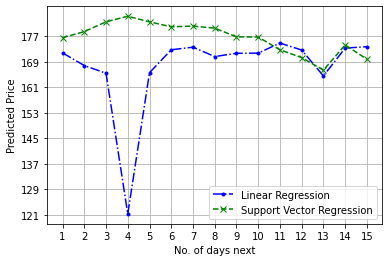

In [14]:
# Plot next n days prediction
plt.plot(svr_prediction, color = 'blue', marker = '.', linestyle = '-.', label='Linear Regression')
plt.plot(lr_prediction, color = 'green', marker = 'x', linestyle = '--', label='Support Vector Regression')
plt.xticks(np.arange(predict_for_days), np.arange(1, predict_for_days+1))
minV = floor(min(min(lr_prediction), min(svr_prediction)))
maxV = ceil(max(max(lr_prediction)+1, max(svr_prediction)+1))
plt.yticks(np.arange(minV, maxV, floor((maxV-minV)/8)))
plt.ylabel('Predicted Price')
plt.xlabel('No. of days next')
plt.grid()
plt.legend()
plt.show()
plt.close()